In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("crm_data_20k.csv")
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]"
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR]
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR]
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]"


In [37]:
df.shape

(19945, 12)

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [41]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [43]:
df.info

<bound method DataFrame.info of                                   master_id order_channel last_order_channel  \
0      cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1      f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2      69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App   
3      1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App   
4      d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop   
...                                     ...           ...                ...   
19940  727e2b6e-ddd4-11e9-a848-000d3a38a36f   Android App            Offline   
19941  25cd53d4-61bf-11ea-8dd8-000d3a38a36f       Desktop            Desktop   
19942  8aea4c2a-d6fc-11e9-93bc-000d3a38a36f       Ios App            Ios App   
19943  e50bb46c-ff30-11e9-a5e8-000d3a38a36f   Android App        Android App   
19944  740998d2-b1f7-11e9-89fa-000d3a38a36f   Android App        Android App   

      f

In [45]:
date_cols = [
    'first_order_date',
    'last_order_date',
    'last_order_date_online',
    'last_order_date_offline'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [47]:
df['total_orders'] = (
    df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
)

In [49]:
df['total_value'] = (
    df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']
)

In [51]:
refernce_date = df['last_order_date'].max()
df['recency_days'] = (refernce_date - df['last_order_date']).dt.days
df['tenure_days'] = (df['last_order_date']- df['first_order_date']).dt.days

In [53]:
df ['high_value_customer'] = np.where(
    df['total_value']> df['total_value'].median(),1,0
)
df['high_value_customer'].value_counts()

high_value_customer
0    9973
1    9972
Name: count, dtype: int64

In [55]:
df.drop(columns=date_cols ,inplace=True)

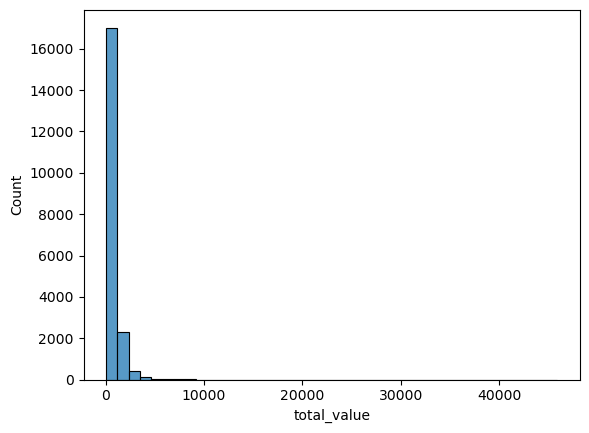

In [57]:
plt.figure()
sns.histplot(df['total_value'],bins =40)
plt.show()

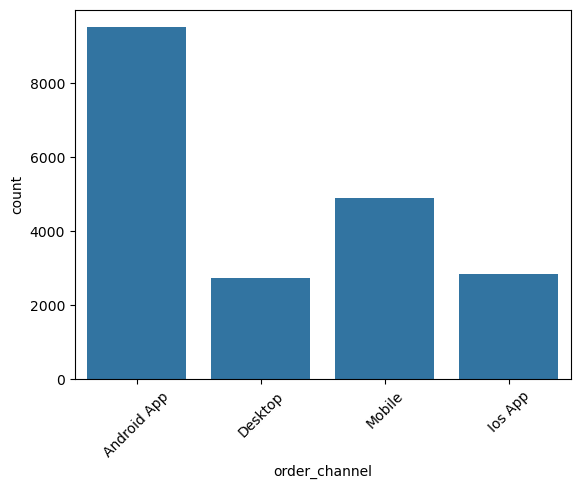

In [59]:
plt.figure()
sns.countplot(x='order_channel',data=df)
plt.xticks(rotation=45)
plt.show()

In [72]:
plt.figure()
sns.scatterplot(x='total_order',y='total_value',data=df)
plt.show()

ValueError: Could not interpret value `total_order` for `x`. An entry with this name does not appear in `data`.

<Figure size 640x480 with 0 Axes>

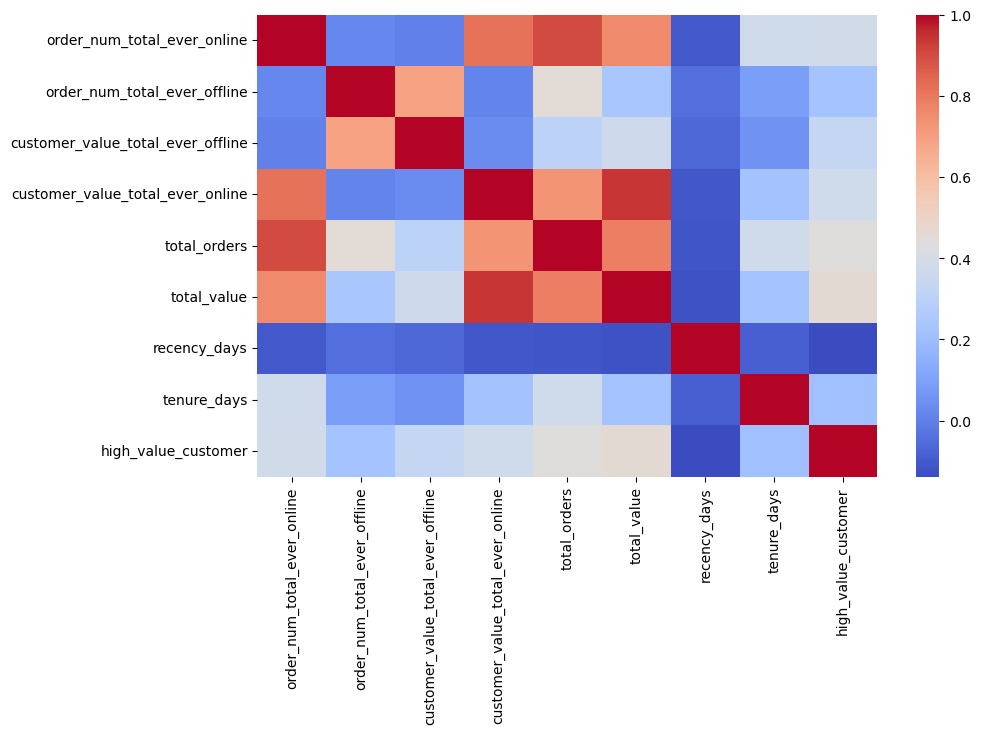

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),cmap='coolwarm')
plt.show()

In [74]:
##feature target split
x = df.drop(['master_id','high_value_customer'],axis=1)
y= df['high_value_customer']

In [80]:
##identify categorical and numerical columns
cat_cols= x.select_dtypes(include='object').columns
num_cols= x.select_dtypes(include=['int64','float64']).columns
cat_cols, num_cols

(Index(['order_channel', 'last_order_channel', 'interested_in_categories_12'], dtype='object'),
 Index(['order_num_total_ever_online', 'order_num_total_ever_offline',
        'customer_value_total_ever_offline', 'customer_value_total_ever_online',
        'total_orders', 'total_value', 'recency_days', 'tenure_days'],
       dtype='object'))

In [82]:
##preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num',StandardScaler() , num_cols),
    ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols)
])

In [84]:
##train test split
x_train , x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y
)

In [114]:
##logistic regression model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
log_model = Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression(max_iter=1000))
])
log_model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [116]:
##logistic regression evaluation
y_pred_rf =log_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy: 0.9914765605414891
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1995
           1       1.00      0.99      0.99      1994

    accuracy                           0.99      3989
   macro avg       0.99      0.99      0.99      3989
weighted avg       0.99      0.99      0.99      3989



In [118]:
##random forest model
rf_model = Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=300,random_state=42))
])
rf_model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [120]:
##random forest evaluation
y_pred_rf =rf_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      1.00      1.00      1994

    accuracy                           1.00      3989
   macro avg       1.00      1.00      1.00      3989
weighted avg       1.00      1.00      1.00      3989



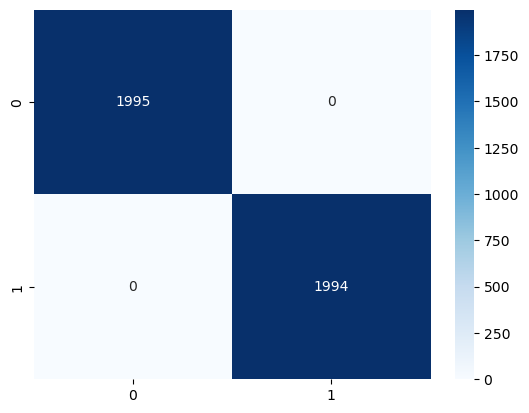

In [122]:
##confusion matrix
cm= confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True ,fmt='d',cmap='Blues')
plt.show()


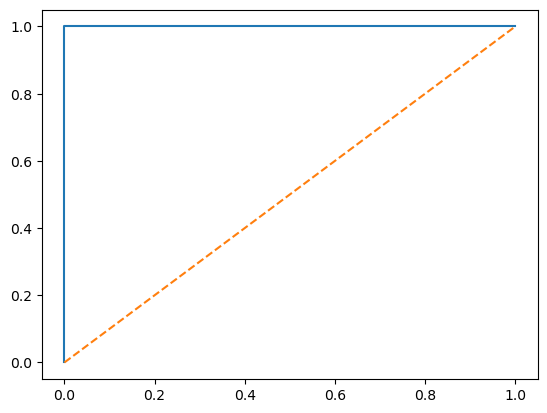

In [124]:
##ROC curve
y_prob = rf_model.predict_proba(x_test)[:,1]
fpr,tpr,_ =roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.show()